In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('TaxiFare.csv')
df.shape

(50000, 8)

In [4]:
df.head(2)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1


In [5]:
df.columns = ['id','amount','datetime','lon_pickup','lat_pickup',
              'lon_drop','lat_drop','passcount']
df.head()

,id,amount,datetime,lon_pickup,lat_pickup,lon_drop,lat_drop,passcount
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [6]:
df.isnull().sum()

id            0
amount        0
datetime      0
lon_pickup    0
lat_pickup    0
lon_drop      0
lat_drop      0
passcount     0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.dtypes

id             object
amount        float64
datetime       object
lon_pickup    float64
lat_pickup    float64
lon_drop      float64
lat_drop      float64
passcount       int64
dtype: object

In [9]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [10]:
df.dtypes

id                         object
amount                    float64
datetime      datetime64[ns, UTC]
lon_pickup                float64
lat_pickup                float64
lon_drop                  float64
lat_drop                  float64
passcount                   int64
dtype: object

#### Feature Engineering

In [11]:
df['Yr'] = df['datetime'].dt.year
df['Qtr'] = df['datetime'].dt.quarter
df['Month'] = df['datetime'].dt.month
df['Day'] = df['datetime'].dt.day
df['Hour'] = df['datetime'].dt.hour
df['DayofWeek'] = df['datetime'].dt.weekday
df.head()

,id,amount,datetime,lon_pickup,lat_pickup,lon_drop,lat_drop,passcount,Yr,Qtr,Month,Day,Hour,DayofWeek
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,2,6,15,17,0
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,5,16,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,3,8,18,0,3
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,2,4,21,4,5
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,1,3,9,7,1


In [12]:
df['DayofWeek'].value_counts()

4    7668
5    7630
3    7406
2    7212
1    6927
0    6639
6    6518
Name: DayofWeek, dtype: int64

In [13]:
# Weekend = 1, Weekday = 0
df['IsWeekend'] = np.where(df['DayofWeek'].isin([5,6]),1,0)

In [14]:
df.head()

,id,amount,datetime,lon_pickup,lat_pickup,lon_drop,lat_drop,passcount,Yr,Qtr,Month,Day,Hour,DayofWeek,IsWeekend
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,2,6,15,17,0,0
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,5,16,1,0
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,3,8,18,0,3,0
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,2,4,21,4,5,1
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,1,3,9,7,1,0


In [15]:
df['Hour'].unique()

array([17, 16,  0,  4,  7,  9, 20, 13,  1, 11, 19, 12, 14, 18, 15,  6, 21,
       23,  3,  8, 10,  2, 22,  5], dtype=int64)

In [16]:
def compute_hr_qtr(x):
    if x>0 and x<=6:   # Night
        return 1
    elif x>6 and x<=12 : # Morning
        return 2
    elif x>12 and x<=18: # Afternoon
        return 3
    else:
        return 4       # Evening

In [17]:
df['Hr_Qtr'] = df['Hour'].apply(compute_hr_qtr)

In [18]:
df['Hr_Qtr'].value_counts(dropna=False)

4    15959
3    14913
2    13574
1     5554
Name: Hr_Qtr, dtype: int64

In [19]:
df['Hr_Qtr1'] = pd.cut(df['Hour'],bins=[0,6,12,18,23],labels=[1,2,3,4])
df['Hr_Qtr1'].value_counts(dropna=False)

3      14913
4      14069
2      13574
1       5554
NaN     1890
Name: Hr_Qtr1, dtype: int64

In [20]:
df.columns

Index(['id', 'amount', 'datetime', 'lon_pickup', 'lat_pickup', 'lon_drop',
       'lat_drop', 'passcount', 'Yr', 'Qtr', 'Month', 'Day', 'Hour',
       'DayofWeek', 'IsWeekend', 'Hr_Qtr', 'Hr_Qtr1'],
      dtype='object')

In [21]:
# from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

In [34]:
# print(df['datetime'].min(),df['datetime'].max())

In [36]:
# cal = calendar()
# holidays = cal.holidays(start=df['datetime'].min(), end=df['datetime'].max())

# df['Holiday'] = df['datetime'].isin(holidays)
# df['Holiday'].value_counts()

#### Check data consistency

In [21]:
df.describe()

,amount,lon_pickup,lat_pickup,lon_drop,lat_drop,passcount,Yr,Qtr,Month,Day,Hour,DayofWeek,IsWeekend,Hr_Qtr
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840,2011.739260,2.422800,6.273300,15.672040,13.489080,3.029980,0.282960,2.825540
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195,1.862639,1.121528,3.461157,8.660789,6.506935,1.956936,0.450442,1.002279
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000,2009.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000,2010.000000,1.000000,3.000000,8.000000,9.000000,1.000000,0.000000,2.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000,2012.000000,2.000000,6.000000,16.000000,14.000000,3.000000,0.000000,3.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000,2013.000000,3.000000,9.000000,23.000000,19.000000,5.000000,1.000000,4.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000,2015.000000,4.000000,12.000000,31.000000,23.000000,6.000000,1.000000,4.000000


In [22]:
print(df[df['amount']<=0].shape)
print(df[df['passcount']==0].shape)

(9, 17)
(165, 17)


In [23]:
df1 = df.copy()

In [24]:
df = df[df['amount']>0]
print(df.shape)

(49991, 17)


In [25]:
df = df[df['passcount']!=0]
df.shape

(49826, 17)

#### Note
1) Latitude ranges from -90 to 90<br>
2) Logitude ranges from -180 to 180<br>

In [26]:
print(df[(df['lat_pickup']<=-90) | (df['lat_pickup']>90)].shape)
print(df[(df['lat_drop']<=-90) | (df['lat_drop']>90)].shape)

(1, 17)
(0, 17)


In [27]:
print(df[(df['lon_pickup']<=-180) | (df['lon_pickup']>180)].shape)
print(df[(df['lon_drop']<=-180) | (df['lon_drop']>180)].shape)

(0, 17)
(0, 17)


In [28]:
df[(df['lat_pickup']<=-90) | (df['lat_pickup']>90)]

,id,amount,datetime,lon_pickup,lat_pickup,lon_drop,lat_drop,passcount,Yr,Qtr,Month,Day,Hour,DayofWeek,IsWeekend,Hr_Qtr,Hr_Qtr1
5686,15:00.0,3.3,2011-07-30 11:15:00+00:00,-73.947235,401.083332,-73.951392,40.778927,1,2011,3,7,30,11,5,1,2,2


In [29]:
df = df[(df['lat_pickup']>=-90) & (df['lat_pickup']<=90)]
df.shape

(49825, 17)

#### Treating Outliers in Lat and Lon

In [31]:
a1 = df.describe(percentiles=[0.01,0.02,0.05,0.95,0.98,0.99]).T
a1 = a1.iloc[:,3:]
a1

,min,1%,2%,5%,50%,95%,98%,99%,max
amount,0.010000,3.300000,3.500000,4.100000,8.500000,30.500000,46.815600,52.000000,200.000000
lon_pickup,-75.423848,-74.014445,-74.010464,-74.006819,-73.981838,-73.871363,-73.239712,0.000000,40.783472
lat_pickup,-74.006893,0.000000,40.583785,40.702190,40.752685,40.787791,40.799559,40.807074,43.098708
lon_drop,-84.654241,-74.015120,-74.011760,-74.007273,-73.980087,-73.873373,-73.474126,0.000000,40.851027
lat_drop,-74.006377,0.000000,40.572868,40.686191,40.753375,40.794042,40.810229,40.832378,43.415190
passcount,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,6.000000,6.000000
Yr,2009.000000,2009.000000,2009.000000,2009.000000,2012.000000,2015.000000,2015.000000,2015.000000,2015.000000
Qtr,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,4.000000,4.000000,4.000000
Month,1.000000,1.000000,1.000000,1.000000,6.000000,12.000000,12.000000,12.000000,12.000000
Day,1.000000,1.000000,1.000000,2.000000,16.000000,29.000000,30.000000,31.000000,31.000000


In [33]:
print(df[df['lat_pickup']==0].shape)
print(df[df['lat_drop']==0].shape)
print(df[df['lon_pickup']==0].shape)
print(df[df['lon_drop']==0].shape)

(951, 17)
(950, 17)
(951, 17)
(953, 17)


In [34]:
print(df[(df['lat_pickup']==0) & (df['lon_pickup']==0)].shape)

(949, 17)


In [32]:
print(df[df['lat_pickup']<40.583785].shape)

(997, 17)


In [35]:
df['lat_pickup'] = np.where(df['lat_pickup']<40.583785,40.583785,df['lat_pickup'])  # 2%ile
df['lat_drop'] = np.where(df['lat_drop']<40.572868,40.572868,df['lat_drop'])        # 2%ile
df['lon_pickup'] = np.where(df['lon_pickup']>-73.239712,-73.239712,df['lon_pickup']) # 98%ile
df['lon_drop'] = np.where(df['lon_drop']>-73.474126,-73.474126,df['lon_drop'])     # 98%ile

In [36]:
a1 = df.describe(percentiles=[0.01,0.02,0.05,0.95,0.98,0.99]).T
a1 = a1.iloc[:,3:]
a1

,min,1%,2%,5%,50%,95%,98%,99%,max
amount,0.010000,3.300000,3.500000,4.100000,8.500000,30.500000,46.815600,52.000000,200.000000
lon_pickup,-75.423848,-74.014445,-74.010464,-74.006819,-73.981838,-73.871363,-73.292918,-73.239712,-73.239712
lat_pickup,40.583785,40.583785,40.585624,40.702190,40.752685,40.787791,40.799559,40.807074,43.098708
lon_drop,-84.654241,-74.015120,-74.011760,-74.007273,-73.980087,-73.873373,-73.493118,-73.474126,-73.474126
lat_drop,40.572868,40.572868,40.573724,40.686191,40.753375,40.794042,40.810229,40.832378,43.415190
passcount,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,6.000000,6.000000
Yr,2009.000000,2009.000000,2009.000000,2009.000000,2012.000000,2015.000000,2015.000000,2015.000000,2015.000000
Qtr,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,4.000000,4.000000,4.000000
Month,1.000000,1.000000,1.000000,1.000000,6.000000,12.000000,12.000000,12.000000,12.000000
Day,1.000000,1.000000,1.000000,2.000000,16.000000,29.000000,30.000000,31.000000,31.000000


In [ ]:
#### Taxi Fare => Distance + PassCount, CarType, Day, Time,

#### Distance Metrics
A(x1,y1), B(x2,y2)
<pre>
1) Minkowski Distance(A,B) = ((|x2-x1|)^p + (|y2-y1|)^p) ^(1/p), p is an int

If p = 2
2) Euclidean Distance(A,B) = sqrt((x2-x1)^2 + (y2-y1)^2))
If p = 1
3) Manhattan Distance(A,B) = (|x2-x1|) + (|y2-y1|)
</pre>

In [37]:
df.columns

Index(['id', 'amount', 'datetime', 'lon_pickup', 'lat_pickup', 'lon_drop',
       'lat_drop', 'passcount', 'Yr', 'Qtr', 'Month', 'Day', 'Hour',
       'DayofWeek', 'IsWeekend', 'Hr_Qtr', 'Hr_Qtr1'],
      dtype='object')

In [38]:
def minkowski_dist(x1,x2,y1,y2,p):
    dist  = ((abs(x2-x1))**p + (abs(y2-y1))**p)**(1/p)
    return dist

In [39]:
df['Euclidean_Dist'] = minkowski_dist(df['lat_pickup'],df['lat_drop'],
                                     df['lon_pickup'],df['lon_drop'],2)

df['Manhattan_Dist'] = minkowski_dist(df['lat_pickup'],df['lat_drop'],
                                     df['lon_pickup'],df['lon_drop'],1)

### Haversine Distance

In [40]:
from sklearn.metrics.pairwise import haversine_distances
from math import radians

In [41]:
def generate_haversine():
    hav_dis = []
    for i in range(len(df)):
        lat_pair_r = [radians(df['lat_pickup'].iloc[i]),
                    radians(df['lon_pickup'].iloc[i])]
        lon_pair_r = [radians(df['lat_drop'].iloc[i]),
                    radians(df['lon_drop'].iloc[i])]
        res = (haversine_distances([lat_pair_r, lon_pair_r])*6371)[0][1]
        # radius of earth = 6371 kms
        hav_dis.append(res)
    return hav_dis

In [42]:
df['Haversine_Dist'] = generate_haversine()

In [43]:
df.head()

,id,amount,datetime,lon_pickup,lat_pickup,lon_drop,lat_drop,passcount,Yr,Qtr,Month,Day,Hour,DayofWeek,IsWeekend,Hr_Qtr,Hr_Qtr1,Euclidean_Dist,Manhattan_Dist,Haversine_Dist
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,2,6,15,17,0,0,3,3,0.009436,0.011742,1.030764
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,5,16,1,0,3,3,0.079696,0.107481,8.450134
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,3,8,18,0,3,0,4,NaN,0.013674,0.019212,1.389525
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,2,4,21,4,5,1,1,1,0.025340,0.029386,2.799270
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,1,3,9,7,1,0,2,2,0.019470,0.027194,1.999157


In [38]:
# !pip install folium

In [44]:
import folium
from folium import Marker

In [45]:
# Map([lat,long])
map1 = folium.Map([40.721319,-73.844311],tiles='openstreetmap')
map1

In [46]:
samp = df.sample(50)
samp.shape

(50, 20)

In [45]:
# df.columns

In [47]:
lat1 = samp['lat_pickup']
lon1 = samp['lon_pickup']
lat2 = samp['lat_drop']
lon2 = samp['lon_drop']

#### Pickup Locations

In [48]:
for i,j in zip(lat1,lon1):
    folium.Marker(location=[i,j],tooltip=f"{str(i)} {str(j)}",
                  icon=folium.Icon(color='red')).add_to(map1)
    
map1

#### Drop Location

In [49]:
for i,j in zip(lat2,lon2):
    folium.Marker(location=[i,j],tooltip=f"{str(i)} {str(j)}",
                  icon=folium.Icon(color='black')).add_to(map1)
    
map1

In [ ]:
# pickup -> drop
# (lat1,lon1) -> (lat2,lon2)

In [50]:
data = []
for lt1,ln1,lt2,ln2 in zip(lat1,lon1,lat2,lon2):
    data.append([[lt1,ln1],[lt2,ln2]])
data

[[[40.731925, -74.000785], [40.745875, -73.971903]],
 [[40.790388, -73.965797], [40.767577, -73.981725]],
 [[40.743592, -73.918778], [40.760134, -73.966917]],
 [[40.583785, -73.239712], [40.572868, -73.474126]],
 [[40.745264, -73.994126], [40.77004, -73.955142]],
 [[40.73758, -73.978047], [40.753602, -73.978613]],
 [[40.764543, -73.966477], [40.736309, -73.986537]],
 [[40.759558, -73.974359], [40.725629, -73.944178]],
 [[40.763893, -73.988728], [40.729059, -73.985299]],
 [[40.799528, -73.968508], [40.790463, -73.969777]],
 [[40.772308, -73.955845], [40.745138, -73.982507]],
 [[40.762398, -73.968355], [40.756105, -73.861597]],
 [[40.771505, -73.953317], [40.775953, -73.950044]],
 [[40.7401, -73.987487], [40.727117, -73.991668]],
 [[40.72703, -73.985604], [40.743257, -73.977022]],
 [[40.644072, -73.790145], [40.759103, -73.831568]],
 [[40.736393, -73.990815], [40.725135, -73.812455]],
 [[40.778462, -73.945362], [40.76787, -73.95617]],
 [[40.76718, -73.95343], [40.772562, -73.949562]],
 [

In [51]:
print(lat1.iloc[0],lon1.iloc[0])
print(lat2.iloc[0],lon2.iloc[0])

40.731925 -74.000785
40.745875 -73.971903


In [69]:

# line_coordinates = [
#     [40.750242, -73.991332], 
#     [40.77996, -73.957297]
# ]

# line = folium.PolyLine(locations=line_coordinates, color='blue', weight=3, opacity=0.8)

# line.add_to(map1)

# map1

In [74]:
# for i,j in data:
#     print([i,j])

In [52]:
for i,j in data:
    line = folium.PolyLine(locations=[i,j], color='blue', weight=3, opacity=0.8)
    line.add_to(map1)

map1

In [53]:
df.head()

,id,amount,datetime,lon_pickup,lat_pickup,lon_drop,lat_drop,passcount,Yr,Qtr,Month,Day,Hour,DayofWeek,IsWeekend,Hr_Qtr,Hr_Qtr1,Euclidean_Dist,Manhattan_Dist,Haversine_Dist
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,2,6,15,17,0,0,3,3,0.009436,0.011742,1.030764
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,5,16,1,0,3,3,0.079696,0.107481,8.450134
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,3,8,18,0,3,0,4,NaN,0.013674,0.019212,1.389525
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,2,4,21,4,5,1,1,1,0.025340,0.029386,2.799270
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,1,3,9,7,1,0,2,2,0.019470,0.027194,1.999157


In [54]:
df.describe()  # amount, passcount, lat,lon

,amount,lon_pickup,lat_pickup,lon_drop,lat_drop,passcount,Yr,Qtr,Month,Day,Hour,DayofWeek,IsWeekend,Hr_Qtr,Euclidean_Dist,Manhattan_Dist,Haversine_Dist
count,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000
mean,11.373212,-73.960844,40.747937,-73.964510,40.748190,1.673437,2011.740151,2.423663,6.275946,15.671631,13.487807,3.029945,0.283051,2.825730,0.039518,0.049843,3.782257
std,9.693602,0.109584,0.039964,0.092088,0.043295,1.287799,1.865203,1.121367,3.460644,8.660797,6.508598,1.957200,0.450485,1.002384,0.073428,0.083408,6.406780
min,0.010000,-75.423848,40.583785,-84.654241,40.572868,1.000000,2009.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992066,40.734890,-73.991151,40.734378,1.000000,2010.000000,1.000000,3.000000,8.000000,9.000000,1.000000,0.000000,2.000000,0.013051,0.016690,1.280583
50%,8.500000,-73.981838,40.752685,-73.980087,40.753375,1.000000,2012.000000,2.000000,6.000000,16.000000,14.000000,3.000000,0.000000,3.000000,0.022344,0.028739,2.211265
75%,12.500000,-73.967145,40.767363,-73.963620,40.768162,2.000000,2013.000000,3.000000,9.000000,23.000000,19.000000,5.000000,1.000000,4.000000,0.041002,0.053869,4.144702
max,200.000000,-73.239712,43.098708,-73.474126,43.415190,6.000000,2015.000000,4.000000,12.000000,31.000000,23.000000,6.000000,1.000000,4.000000,10.661284,10.837566,898.809128


#### Distance should not be 0 

Reasons
1) Same pickup and drop locations = Round trip rides

In [55]:
print(df[df['Euclidean_Dist']==0].shape)
print(df[df['Manhattan_Dist']==0].shape)
print(df[df['Haversine_Dist']==0].shape)

(520, 20)
(520, 20)
(520, 20)


#### Records where pickup location is same as drop location

In [56]:
round_trip = df[(df['lat_pickup']==df['lat_drop']) & (df['lon_pickup']==df['lon_drop'])]
round_trip.shape

(520, 20)

In [57]:
df.shape

(49825, 20)

In [62]:
49825-520

49305

In [59]:
df2 = df.copy()

In [63]:
df = df[(df['Euclidean_Dist']>0) | (df['Manhattan_Dist']>0) | (df['Haversine_Dist']>0)]
df.shape

(49305, 20)

### EDA

In [64]:
df.columns

Index(['id', 'amount', 'datetime', 'lon_pickup', 'lat_pickup', 'lon_drop',
       'lat_drop', 'passcount', 'Yr', 'Qtr', 'Month', 'Day', 'Hour',
       'DayofWeek', 'IsWeekend', 'Hr_Qtr', 'Hr_Qtr1', 'Euclidean_Dist',
       'Manhattan_Dist', 'Haversine_Dist'],
      dtype='object')

In [65]:
cat_cols = ['passcount','Yr', 'Qtr', 'Month', 'Day', 'Hour',
            'DayofWeek', 'IsWeekend', 'Hr_Qtr']
num_cols = ['amount','Euclidean_Dist','Manhattan_Dist', 'Haversine_Dist']

#### Univariate - Cat cols

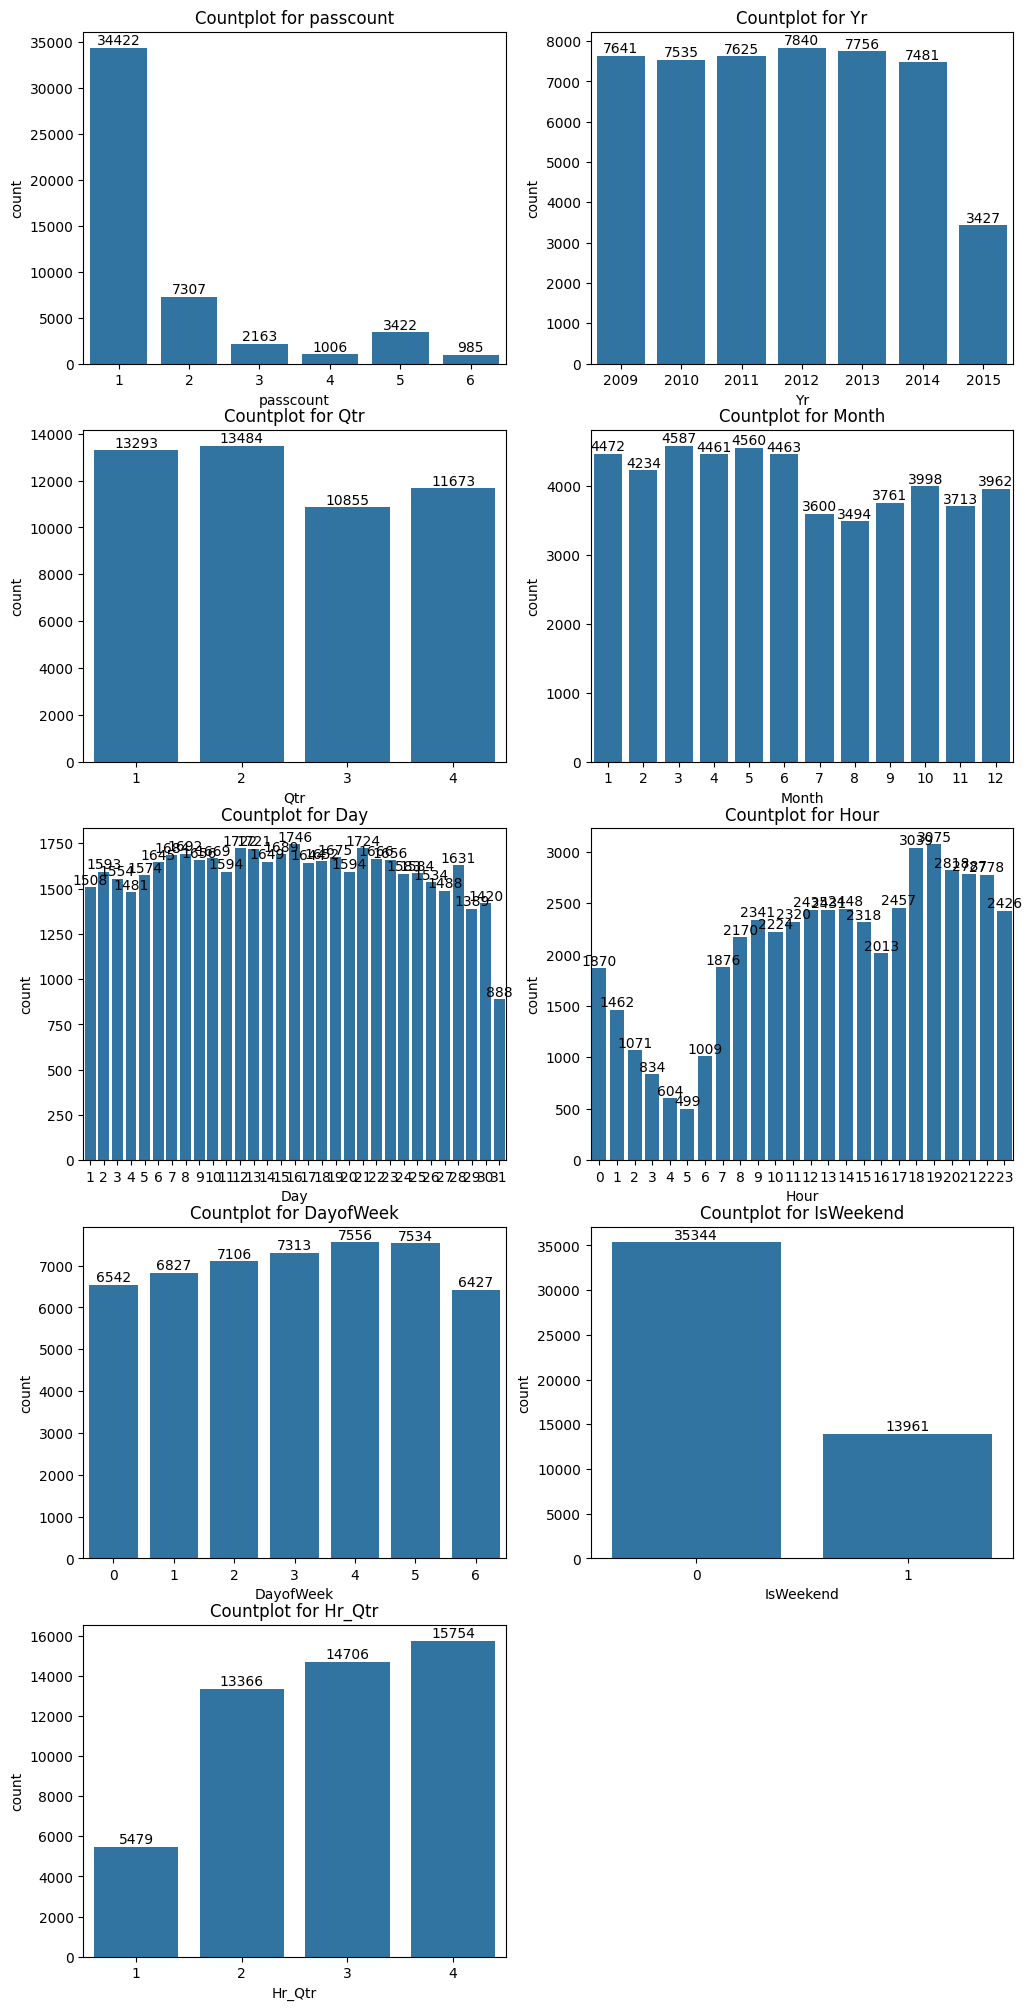

In [66]:
plt.figure(figsize=(12,25))
for i in range(len(cat_cols)):
    plt.subplot(5,2,i+1)
    ax = sns.countplot(x=df[cat_cols[i]])
    ax.bar_label(ax.containers[0])
    plt.title(f'Countplot for {cat_cols[i]}')
plt.show()

#### Inferences
<pre>
1) Peak Hour = 6-7pm
2) Peak Qtr = 2 and 1
3) Months with most rides = 4,5,6,3,2,1
4) Most busy days for rides = Fri and Sat
5) Peak Hr Qtr= 4 and 3
</pre>

#### Univariate - Num cols

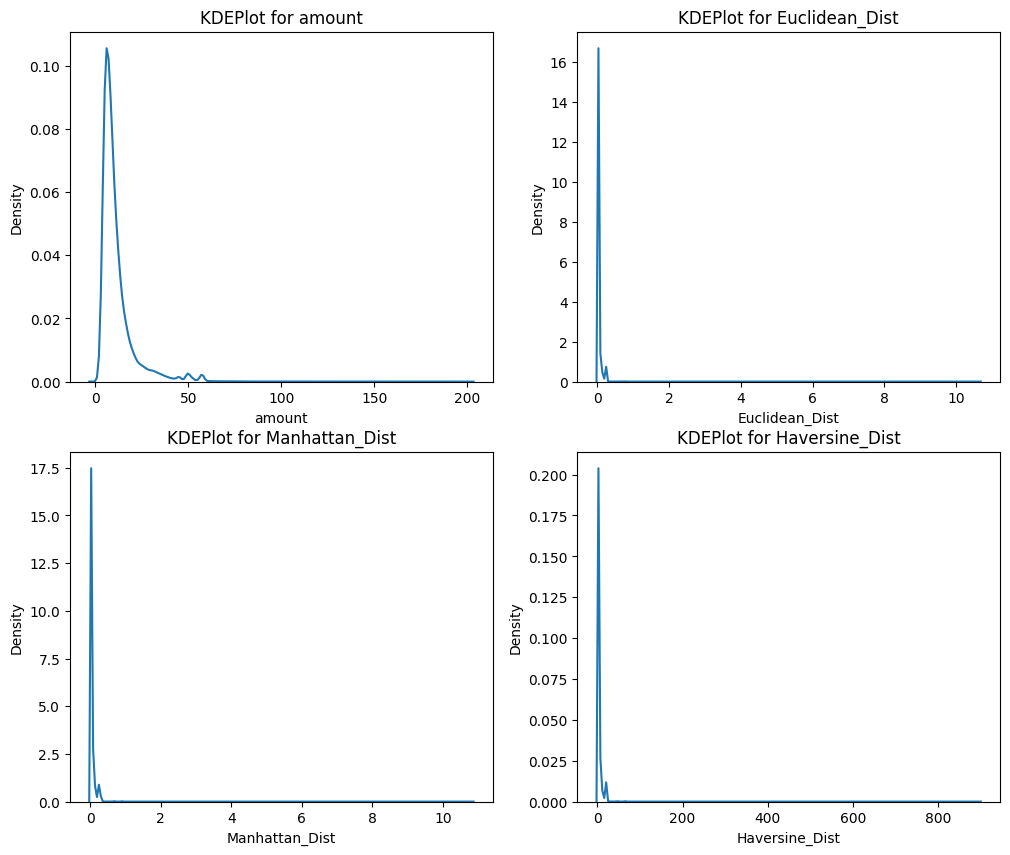

In [67]:
plt.figure(figsize=(12,10))
for i in range(len(num_cols)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(x=df[num_cols[i]])
    plt.title(f'KDEPlot for {num_cols[i]}')
plt.show()

In [68]:
df.columns

Index(['id', 'amount', 'datetime', 'lon_pickup', 'lat_pickup', 'lon_drop',
       'lat_drop', 'passcount', 'Yr', 'Qtr', 'Month', 'Day', 'Hour',
       'DayofWeek', 'IsWeekend', 'Hr_Qtr', 'Hr_Qtr1', 'Euclidean_Dist',
       'Manhattan_Dist', 'Haversine_Dist'],
      dtype='object')

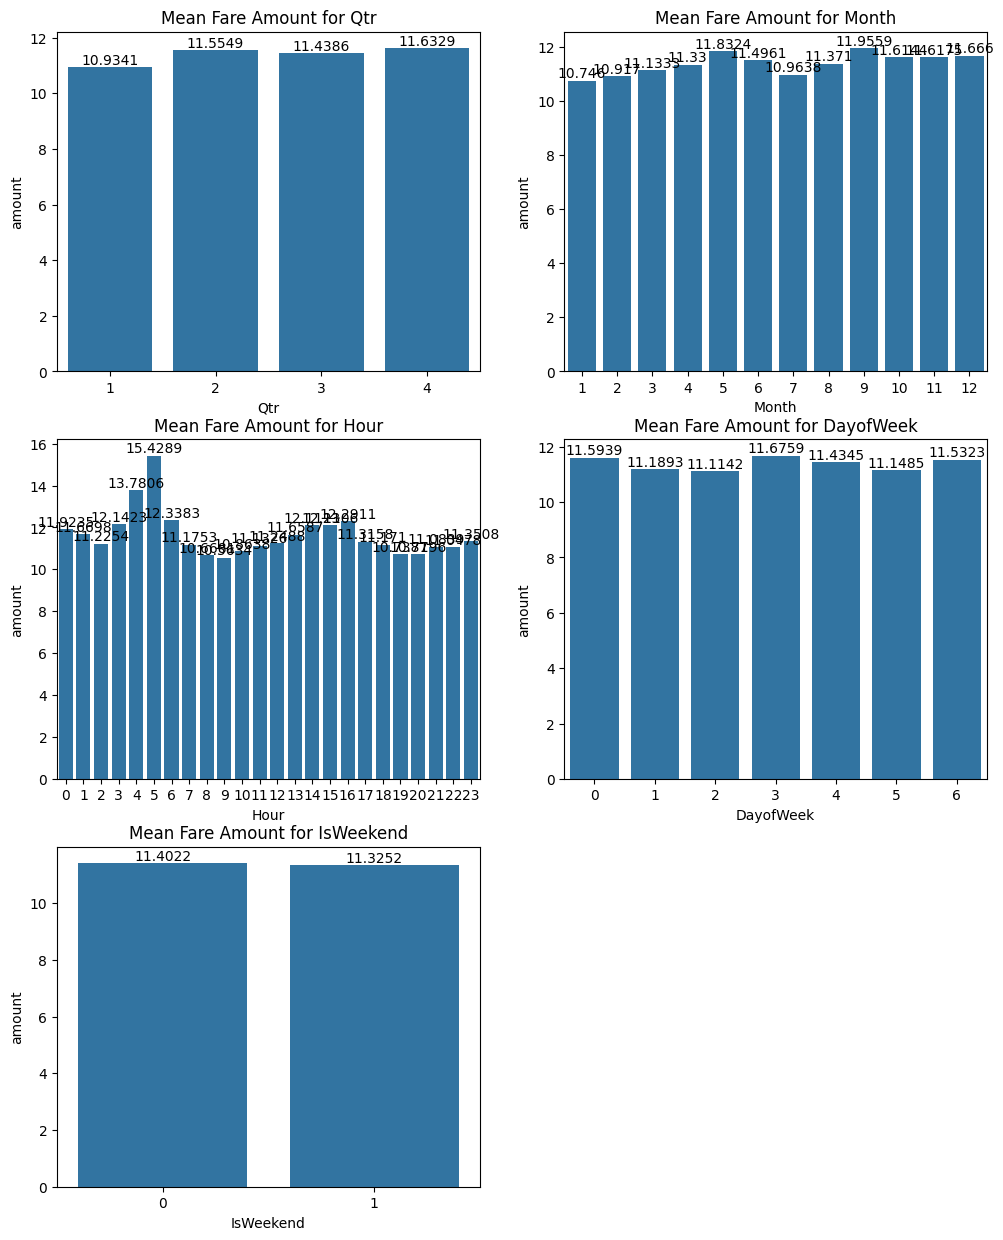

In [69]:
cols = ['Qtr','Month','Hour','DayofWeek','IsWeekend']

plt.figure(figsize=(12,15))
for i in range(len(cols)):
    plt.subplot(3,2,i+1)
    ax = sns.barplot(x=df[cols[i]],y=df['amount'],errorbar=('ci',0))  # mean amount
    ax.bar_label(ax.containers[0])
    plt.title(f'Mean Fare Amount for {cols[i]}')
plt.show()

#### Outlier Treatment

In [76]:
a1 = df.describe(percentiles=[0.01,0.02,0.05,0.95,0.98,0.99]).T
a1 = a1.iloc[:,3:]
a1

,min,1%,2%,5%,50%,95%,98%,99%,max
amount,1.000000e-02,3.300000,3.700000,4.100000,8.500000,30.500000,45.830000,52.000000,200.000000
lon_pickup,-7.542385e+01,-74.014345,-74.010426,-74.006815,-73.981867,-73.872122,-73.239712,-73.239712,-73.239712
lat_pickup,4.058378e+01,40.583785,40.583785,40.702374,40.752694,40.787722,40.799303,40.806796,43.098708
lon_drop,-8.465424e+01,-74.015077,-74.011728,-74.007271,-73.980102,-73.874204,-73.474126,-73.474126,-73.474126
lat_drop,4.057287e+01,40.572868,40.572868,40.686393,40.753392,40.793980,40.810033,40.832131,43.415190
passcount,1.000000e+00,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,6.000000,6.000000
Yr,2.009000e+03,2009.000000,2009.000000,2009.000000,2012.000000,2015.000000,2015.000000,2015.000000,2015.000000
Qtr,1.000000e+00,1.000000,1.000000,1.000000,2.000000,4.000000,4.000000,4.000000,4.000000
Month,1.000000e+00,1.000000,1.000000,1.000000,6.000000,12.000000,12.000000,12.000000,12.000000
Day,1.000000e+00,1.000000,1.000000,2.000000,16.000000,29.000000,30.000000,31.000000,31.000000


In [80]:
print(df[df['Euclidean_Dist']>0.234668].shape)
print(df[df['Manhattan_Dist']>0.305851].shape)
print(df[df['Haversine_Dist']>20.744976].shape)

(1277, 20)
(494, 20)
(494, 20)


In [81]:
df['Euclidean_Dist'] = np.where(df['Euclidean_Dist']>0.234668,0.234668,df['Euclidean_Dist'])
df['Manhattan_Dist'] = np.where(df['Manhattan_Dist']>0.305851,0.305851,df['Manhattan_Dist'])
df['Haversine_Dist'] = np.where(df['Haversine_Dist']>20.744976,20.744976,df['Haversine_Dist'])

In [82]:
a1 = df.describe(percentiles=[0.01,0.02,0.05,0.95,0.98,0.99]).T
a1 = a1.iloc[:,3:]
a1

,min,1%,2%,5%,50%,95%,98%,99%,max
amount,1.000000e-02,3.300000,3.700000,4.100000,8.500000,30.500000,45.830000,52.000000,200.000000
lon_pickup,-7.542385e+01,-74.014345,-74.010426,-74.006815,-73.981867,-73.872122,-73.239712,-73.239712,-73.239712
lat_pickup,4.058378e+01,40.583785,40.583785,40.702374,40.752694,40.787722,40.799303,40.806796,43.098708
lon_drop,-8.465424e+01,-74.015077,-74.011728,-74.007271,-73.980102,-73.874204,-73.474126,-73.474126,-73.474126
lat_drop,4.057287e+01,40.572868,40.572868,40.686393,40.753392,40.793980,40.810033,40.832131,43.415190
passcount,1.000000e+00,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,6.000000,6.000000
Yr,2.009000e+03,2009.000000,2009.000000,2009.000000,2012.000000,2015.000000,2015.000000,2015.000000,2015.000000
Qtr,1.000000e+00,1.000000,1.000000,1.000000,2.000000,4.000000,4.000000,4.000000,4.000000
Month,1.000000e+00,1.000000,1.000000,1.000000,6.000000,12.000000,12.000000,12.000000,12.000000
Day,1.000000e+00,1.000000,1.000000,2.000000,16.000000,29.000000,30.000000,31.000000,31.000000


In [83]:
df['amount'] = np.where(df['amount']>52,52,df['amount'])
df['amount'] = np.where(df['amount']<3.3000,3.3000,df['amount'])

In [85]:
a1 = df.describe(percentiles=[0.01,0.02,0.05,0.95,0.98,0.99]).T
a1 = a1.iloc[:,3:]
a1

,min,1%,2%,5%,50%,95%,98%,99%,max
amount,3.300000e+00,3.300000,3.700000,4.100000,8.500000,30.500000,45.830000,52.000000,52.000000
lon_pickup,-7.542385e+01,-74.014345,-74.010426,-74.006815,-73.981867,-73.872122,-73.239712,-73.239712,-73.239712
lat_pickup,4.058378e+01,40.583785,40.583785,40.702374,40.752694,40.787722,40.799303,40.806796,43.098708
lon_drop,-8.465424e+01,-74.015077,-74.011728,-74.007271,-73.980102,-73.874204,-73.474126,-73.474126,-73.474126
lat_drop,4.057287e+01,40.572868,40.572868,40.686393,40.753392,40.793980,40.810033,40.832131,43.415190
passcount,1.000000e+00,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,6.000000,6.000000
Yr,2.009000e+03,2009.000000,2009.000000,2009.000000,2012.000000,2015.000000,2015.000000,2015.000000,2015.000000
Qtr,1.000000e+00,1.000000,1.000000,1.000000,2.000000,4.000000,4.000000,4.000000,4.000000
Month,1.000000e+00,1.000000,1.000000,1.000000,6.000000,12.000000,12.000000,12.000000,12.000000
Day,1.000000e+00,1.000000,1.000000,2.000000,16.000000,29.000000,30.000000,31.000000,31.000000


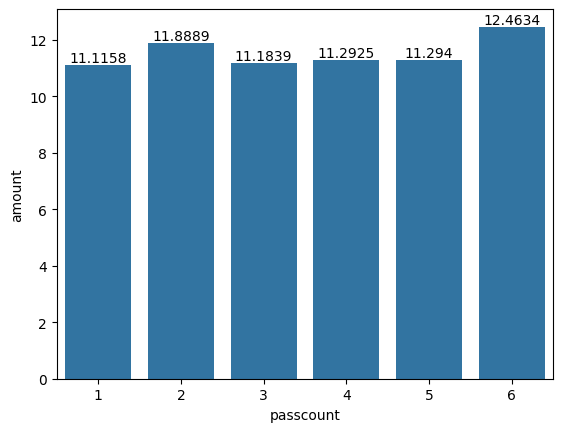

In [87]:
ax = sns.barplot(x=df['passcount'],y=df['amount'],errorbar=('ci',0))
ax.bar_label(ax.containers[0])
plt.show()

#### Encoding

Not required

#### Select x and y

In [90]:
df.columns

Index(['id', 'amount', 'datetime', 'lon_pickup', 'lat_pickup', 'lon_drop',
       'lat_drop', 'passcount', 'Yr', 'Qtr', 'Month', 'Day', 'Hour',
       'DayofWeek', 'IsWeekend', 'Hr_Qtr', 'Hr_Qtr1', 'Euclidean_Dist',
       'Manhattan_Dist', 'Haversine_Dist'],
      dtype='object')

In [91]:
x = df[['passcount', 'Yr', 'Qtr', 'Month', 'Day', 'Hour',
       'DayofWeek', 'IsWeekend', 'Hr_Qtr', 'Euclidean_Dist',
       'Manhattan_Dist', 'Haversine_Dist']]
y = df['amount']

#### Split data into train and test

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(34513, 12) (14792, 12)
(34513,) (14792,)


In [94]:
from sklearn.metrics import *

In [109]:
def eval_model(ytest,ypred):
    mse = mean_squared_error(ytest,ypred) 
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(ytest,ypred)
    r2 = r2_score(ytest,ypred)
    res  = {'MSE':mse,'RMSE':rmse,'MAE':mae,'R2':r2}
    print('MSE',mse,'RMSE',rmse,'MAE',mae)
    print('R2',r2)
    return res

In [104]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#### 1) LinReg

In [102]:
lr1 = LinearRegression()
lr1.fit(x_train,y_train)
print('Train Score',lr1.score(x_train,y_train))
print('Test Score',lr1.score(x_test,y_test))

Train Score 0.6303771206564408
Test Score 0.615792911948752


In [110]:
ypred_lr1 = lr1.predict(x_test)
lr1_res = eval_model(y_test,ypred_lr1)

MSE 30.731109148345233 RMSE 5.543564660788691 MAE 3.1106583888087855
R2 0.615792911948752


#### 2) DT Reg

In [106]:
dt1 = DecisionTreeRegressor(max_depth=7,min_samples_split=8)
dt1.fit(x_train,y_train)

print('Train Score',dt1.score(x_train,y_train))
print('Test Score',dt1.score(x_test,y_test))

Train Score 0.8197001983515739
Test Score 0.7714246982360089


In [112]:
ypred_dt1 = dt1.predict(x_test)
dt1_res = eval_model(y_test,ypred_dt1)

MSE 18.28277708970377 RMSE 4.275836419895383 MAE 2.215343038457784
R2 0.7714246982360089


#### 3) RF Reg

In [117]:
rf1 = RandomForestRegressor(n_estimators=80,max_depth=7,min_samples_split=8)
rf1.fit(x_train,y_train)

print('Train Score',rf1.score(x_train,y_train))
print('Test Score',rf1.score(x_test,y_test))

Train Score 0.8312679175864116
Test Score 0.7989129127825091


In [118]:
ypred_rf1 = rf1.predict(x_test)
rf1_res = eval_model(y_test,ypred_rf1)

MSE 16.084110412817918 RMSE 4.010500020298955 MAE 2.132300378087067
R2 0.7989129127825091


In [119]:
all_res = pd.DataFrame([lr1_res,dt1_res,rf1_res],index=['Lin_Reg','DT_Reg','RF_Reg'])
all_res

,MSE,RMSE,MAE,R2
Lin_Reg,30.731109,5.543565,3.110658,0.615793
DT_Reg,18.282777,4.275836,2.215343,0.771425
RF_Reg,16.084110,4.010500,2.132300,0.798913


In [120]:
from sklearn.tree import plot_tree, export_text

In [121]:
fn = x_train.columns
cn = y_train

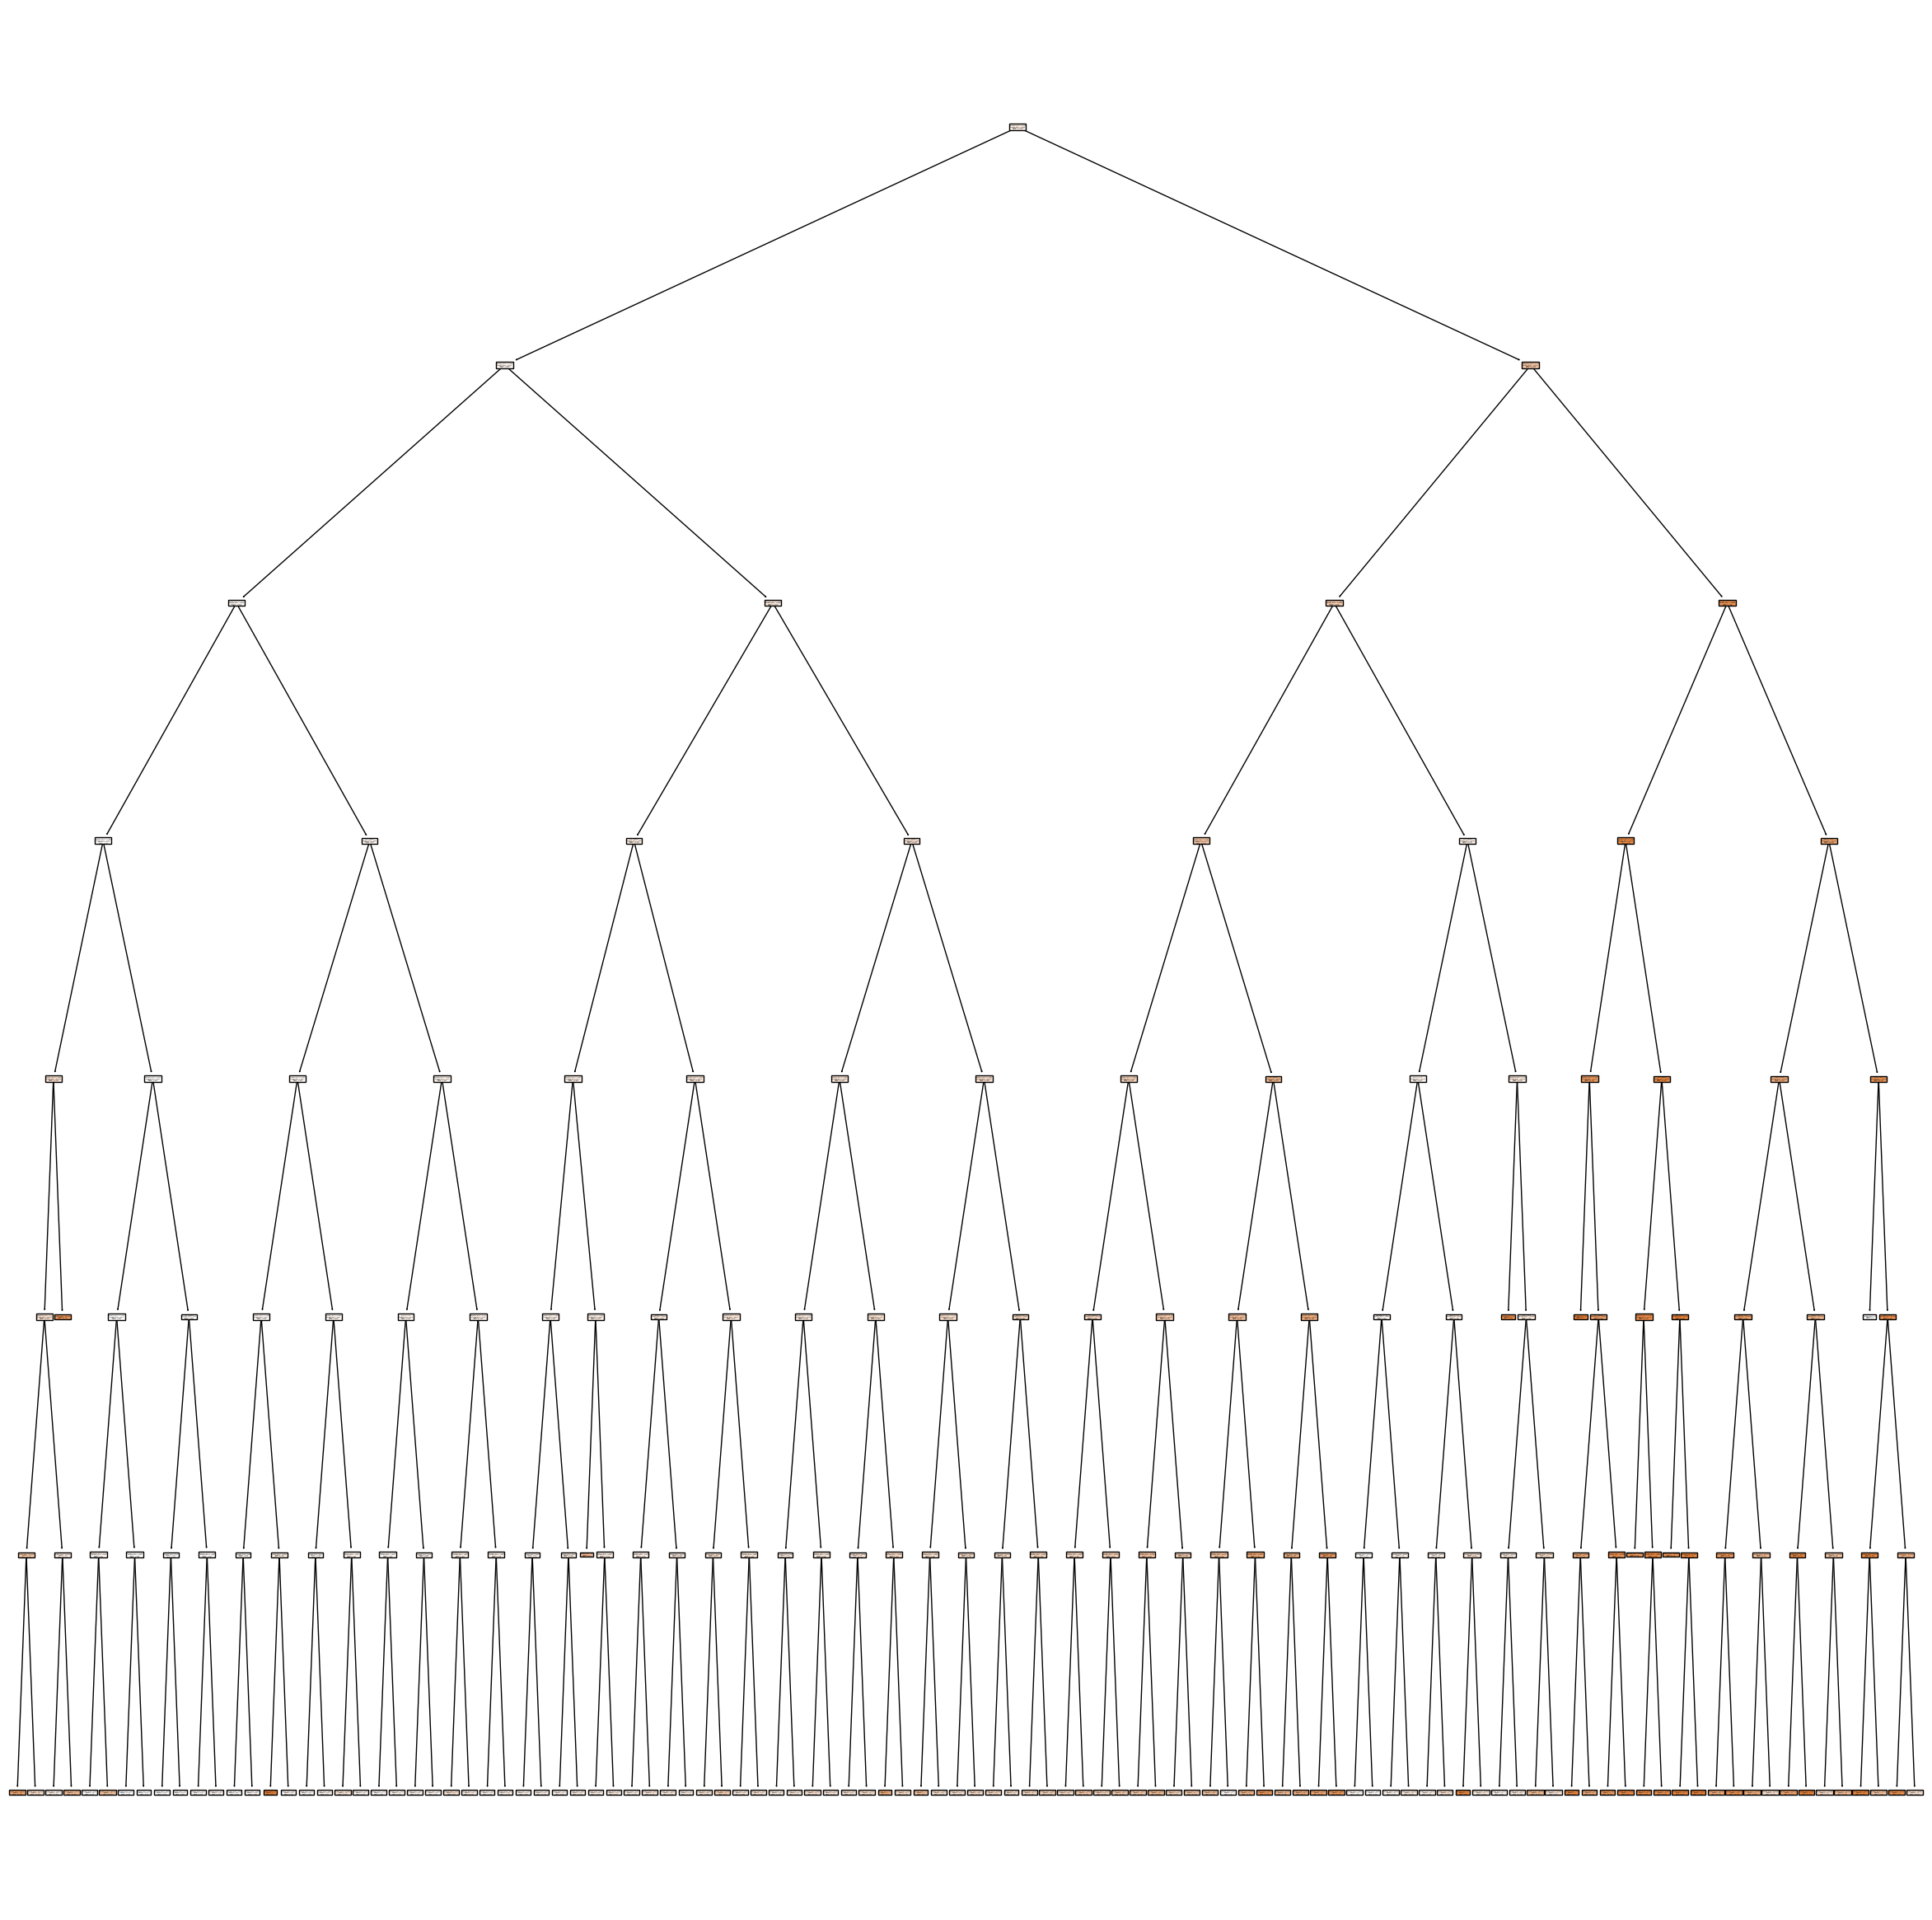

In [122]:
plt.figure(figsize=(30,30))
plot_tree(rf1.estimators_[0],feature_names=fn,class_names=cn,filled=True)
plt.show()

#### Generate Decision Rules

In [125]:
print(export_text(rf1.estimators_[0],feature_names = x_train.columns.to_list()))

|--- Euclidean_Dist <= 0.07
|   |--- Euclidean_Dist <= 0.03
|   |   |--- Euclidean_Dist <= 0.02
|   |   |   |--- Haversine_Dist <= 0.08
|   |   |   |   |--- Euclidean_Dist <= 0.00
|   |   |   |   |   |--- Manhattan_Dist <= 0.00
|   |   |   |   |   |   |--- Month <= 4.50
|   |   |   |   |   |   |   |--- value: [38.93]
|   |   |   |   |   |   |--- Month >  4.50
|   |   |   |   |   |   |   |--- value: [17.64]
|   |   |   |   |   |--- Manhattan_Dist >  0.00
|   |   |   |   |   |   |--- Month <= 11.50
|   |   |   |   |   |   |   |--- value: [11.30]
|   |   |   |   |   |   |--- Month >  11.50
|   |   |   |   |   |   |   |--- value: [29.54]
|   |   |   |   |--- Euclidean_Dist >  0.00
|   |   |   |   |   |--- value: [44.41]
|   |   |   |--- Haversine_Dist >  0.08
|   |   |   |   |--- Euclidean_Dist <= 0.01
|   |   |   |   |   |--- Haversine_Dist <= 0.20
|   |   |   |   |   |   |--- Manhattan_Dist <= 0.00
|   |   |   |   |   |   |   |--- value: [6.92]
|   |   |   |   |   |   |--- Manhattan_Dist

#### Feat Importance

In [126]:
fimp = pd.DataFrame({'Feature':x_train.columns,'FImp':rf1.feature_importances_})
fimp = fimp.sort_values('FImp',ascending=False)
fimp

,Feature,FImp
9,Euclidean_Dist,0.781372
10,Manhattan_Dist,0.133889
11,Haversine_Dist,0.038056
1,Yr,0.023814
5,Hour,0.006978
4,Day,0.005141
3,Month,0.004772
6,DayofWeek,0.002185
0,passcount,0.001651
8,Hr_Qtr,0.001104


In [129]:
thresh = 0.002
imp_feat = fimp['Feature'][fimp['FImp']>thresh].values
imp_feat

array(['Euclidean_Dist', 'Manhattan_Dist', 'Haversine_Dist', 'Yr', 'Hour',
       'Day', 'Month', 'DayofWeek'], dtype=object)

#### Generating Model after Selecting Imp Feat

In [130]:
x2 = df[imp_feat]
y2 = df['amount']

In [131]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,y2,test_size=0.3,random_state=42)

In [136]:
rf2 = RandomForestRegressor(n_estimators=90,max_depth=7,min_samples_split=8)
rf2.fit(x_train2,y_train2)

print('Train Score',rf2.score(x_train2,y_train2))
print('Test Score',rf2.score(x_test2,y_test2))

Train Score 0.830878824010779
Test Score 0.7989125019564415


In [137]:
ypred_rf2 = rf2.predict(x_test2)
rf2_res = eval_model(y_test2,ypred_rf2)

MSE 16.08414327306729 RMSE 4.010504117073974 MAE 2.13849617871139
R2 0.7989125019564415


#### Hyperparameter Tuning

In [140]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [141]:
hparams = {'n_estimators':[70,80,90,85,95],
          'max_depth':[5,6,7,8,9],
          'min_samples_split':list(range(8,15,2)),
          'min_samples_leaf': [7,8,9],
          'max_features' : [5,6,7,8]}

print(5*5*4*5*4)

2000


In [ ]:
rf_base = RandomForestRegressor()

gs_cv = GridSearchCV(estimator=rf_base,param_grid=hparams,cv=5,scoring='neg_mean_squared_error')
gs_cv.fit(x_train,y_train)